# Funciones y módulos

## Funciones como argumento y retorno

Las funciones pueden ser pasadas como argumento y pueden ser retornadas por una función, como cualquier otro objeto (números, listas, tuples, cadenas de caracteres, diccionarios, etc):


In [1]:
def mas_uno(func):
  "Devuelve una función"
  def fun(args):
    "Agrega 1 a cada uno de los elementos y luego aplica la función"
    xx = [x+1 for x in args]
    y= func(xx)
    return y
  return fun

La función `mas_uno` toma como argumento una función y devuelve otra función.

In [2]:
a = [1, 3.3, 5, 7.5, 2.2]
h= mas_uno(sum)                 # h es una función
f= mas_uno(min)                 # f es una función
g= mas_uno(max)                 # g es una función

In [3]:
print(a)
print(sum(a), h(a))
print(min(a), f(a))
print(max(a), g(a))



[1, 3.3, 5, 7.5, 2.2]
19.0 24.0
1 2
7.5 8.5


## Aplicacion: Ordenamiento de listas

Consideremos el problema del ordenamiento de una lista de strings. Como vemos el resultado usual no es necesariamente el deseado

In [4]:
s1 = ['Estudiantes', 'caballeros', 'Python', 'Curso', 'pc', 'aereo']
print(s1)
print(sorted(s1))

['Estudiantes', 'caballeros', 'Python', 'Curso', 'pc', 'aereo']
['Curso', 'Estudiantes', 'Python', 'aereo', 'caballeros', 'pc']


Acá `sorted` es una función, similar al método `str.sort()` que mencionamos anteriormente, con la diferencia que devuelve una nueva lista con los elementos ordenados.
Como los elementos son *strings*, la comparación se hace respecto a su posición en el abecedario. En este caso no es lo mismo mayúsculas o minúsculas.

In [5]:
s2 = ['estudiantes', 'caballeros', 'python', 'curso', 'pc', 'aereo']
print(s2)
print(sorted(s2))

['estudiantes', 'caballeros', 'python', 'curso', 'pc', 'aereo']
['aereo', 'caballeros', 'curso', 'estudiantes', 'pc', 'python']


Posiblemente queremos el orden que obtuvimos en segundo lugar pero con los elementos dados originalmente (con sus mayúsculas y minúsculas originales).
Para poder modificar el modo en que se ordenan los elementos, la función `sorted` (y el método `sort`) tienen el argumento opcional `key`

In [6]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



Como vemos tiene un argumento `key` que acepta una función.

In [7]:
sorted(s1, key=str.lower)

['aereo', 'caballeros', 'Curso', 'Estudiantes', 'pc', 'Python']

Como vemos, los strings están ordenados adecuadamente. Si queremos ordenarlos por longitud de la palabra

In [8]:
sorted(s1, key=len)

['pc', 'Curso', 'aereo', 'Python', 'caballeros', 'Estudiantes']

Supongamos que queremos ordenarla alfabéticamente por la segunda letra

In [9]:
def segunda(a):
  return a[1]

sorted(s1, key=segunda)

['caballeros', 'pc', 'aereo', 'Estudiantes', 'Curso', 'Python']

## Funciones anónimas

En ocasiones como esta suele ser más rápido (o conveniente) definir la función, que se va a utilizar una única vez, sin darle un nombre. Estas se llaman funciones *lambda*, y el ejemplo anterior se escribiría

In [10]:
sorted(s1, key=lambda a: a[1])

['caballeros', 'pc', 'aereo', 'Estudiantes', 'Curso', 'Python']

Si queremos ordenarla alfabéticamente empezando deesde la última letra:

In [11]:
sorted(s1, key=lambda a: a[::-1])

['pc', 'Python', 'aereo', 'Curso', 'Estudiantes', 'caballeros']

## Ejemplo: Funciones como argumentos de funciones

Veamos en más detalle el caso de funciones que reciben como argumento otra función, estudiando un caso usual: una función de integración debe recibir como argumento al menos una función a integrar y los límites de integración:

In [12]:
%load scripts/05_ejemplo_1.py

In [13]:
# %load scripts/05_ejemplo_1.py
def integrate_simps(f, a, b, N=10):
  """Calcula numéricamente la integral de la función en el intervalo dado
  utilizando la regla de Simpson

  Keyword Arguments:
  f -- Función a integrar
  a -- Límite inferior
  b -- Límite superior
  N -- El intervalo se separa en 2*N intervalos
  """
  h = (b - a) / (2 * N)
  I = f(a) - f(b)
  for j in range(1, N + 1):
    x2j = a + 2 * j * h
    x2jm1 = a + (2 * j - 1) * h
    I += 2 * f(x2j) + 4 * f(x2jm1)
  return I * h / 3


En este ejemplo programamos la fórmula de integración de Simpson para obtener la integral de una función `f(x)` provista por el usuario, en un dado intervalo:
$$
\int _{a}^{b}f(x)\,dx\approx \frac{h}{3} \bigg[ f(x_{0}) + 2 \sum_{j=1}^{n/2} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j-1}) - f(x_{n})\bigg]
$$

¿Cómo usamos la función de integración?

In [14]:
def potencia2(x):
  return x**2

integrate_simps(potencia2, 0, 3, 7)

9.0

Acá definimos una función, y se la pasamos como argumento a la función de integración. 

### Uso de funciones anónimas

Veamos como sería el uso de funciones anónimas en este contexto

In [15]:
integrate_simps(lambda x: x**2, 0, 3, 7)

9.0

La notación es un poco más corta, que es cómodo pero no muy relevante para un caso.
Si queremos, por ejemplo, aplicar el integrador a una familia de funciones la notación se simplifica notablemente:

In [16]:
print('Integrales:')
a = 0
b = 3
for n in range(6):
  I = integrate_simps(lambda x: (n + 1) * x**n, a, b, 10)
  print('I ( {} x^{}, {}, {}) = {:.5f}'.format(n + 1, n, a, b, I))


Integrales:
I ( 1 x^0, 0, 3) = 3.00000
I ( 2 x^1, 0, 3) = 9.00000
I ( 3 x^2, 0, 3) = 27.00000
I ( 4 x^3, 0, 3) = 81.00000
I ( 5 x^4, 0, 3) = 243.00101
I ( 6 x^5, 0, 3) = 729.00911


Este es un ejemplo de uso de las funciones anónimas `lambda`. Recordemos que la forma general de las funciones `lambda` es:
```python
lambda x,y,z: expresión_de(x,y,z)
```
por ejemplo en el ejemplo anterior, para calcular $(n+1) x^n$, hicimos:
```python
lambda x: (n+1) * x**n
```

## Funciones que retornan funciones

Veamos ahora una función que retorna una función. Supongamos que tenemos una tabla de puntos (x,y) por los que pasan nuestros datos y queremos interpolar los datos con un polinomio.

Sabemos que dados N puntos, hay un único polinomio de grado N que pasa por todos los puntos. En este ejemplo utilizamos la fórmula de Lagrange para obtenerlo.

In [17]:
%load scripts/ejemplo_05_2.py

In [ ]:
# %load scripts/ejemplo_05_2.py
def polinomio_interp(x, y):
  """Devuelve el polinomio interpolador que pasa por los puntos (x_i, y_i)

    Warning: La implementación es numéricamente inestable. Funciona para algunos puntos (menor a 20)

  Keyword Arguments:
  x -- Lista con los valores de x
  y -- Lista con los valores de y
  """

  M = len(x)

  def polin(xx):
    """Evalúa el polinomio interpolador de Lagrange"""
    P = 0

    for j in range(M):
      pt = y[j]
      for k in range(M):
        if k == j:
          continue
        fac = x[j] - x[k]
        pt *= (xx - x[k]) / fac
      P += pt
    return P

  return polin


In [18]:
# %load scripts/ejemplo_05_2.py
def polinomio_interp(x, y):
  """Devuelve el polinomio interpolador que pasa por los puntos (x_i, y_i)

    Warning: La implementación es numéricamente inestable. Funciona para algunos puntos (menor a 20)

  Keyword Arguments:
  x -- Lista con los valores de x
  y -- Lista con los valores de y
  """

  M = len(x)

  def polin(xx):
    """Evalúa el polinomio interpolador de Lagrange"""
    P = 0

    for j in range(M):
      pt = y[j]
      for k in range(M):
        if k == j:
          continue
        fac = x[j] - x[k]
        pt *= (xx - x[k]) / fac
      P += pt
    return P

  return polin


In [19]:
# %load scripts/ejemplo_05_2.py
def polinomio_interp(x, y):
  """Devuelve el polinomio interpolador que pasa por los puntos (x_i, y_i)

    Warning: La implementación es numéricamente inestable. Funciona para algunos puntos (menor a 20)

  Keyword Arguments:
  x -- Lista con los valores de x
  y -- Lista con los valores de y
  """

  M = len(x)

  def polin(xx):
    """Evalúa el polinomio interpolador de Lagrange"""
    P = 0

    for j in range(M):
      pt = y[j]
      for k in range(M):
        if k == j:
          continue
        fac = x[j] - x[k]
        pt *= (xx - x[k]) / fac
      P += pt
    return P

  return polin


Lo que obtenemos al llamar a esta función es una función

In [20]:
f = polinomio_interp([0,1], [0,2])

In [21]:
f

<function __main__.polinomio_interp.<locals>.polin(xx)>

In [22]:
help(f)

Help on function polin in module __main__:

polin(xx)
    Evalúa el polinomio interpolador de Lagrange



In [23]:
f(3.4)

6.8

Este es el resultado esperado porque queremos el polinomio que pasa por dos puntos (una recta), y en este caso es la recta $y = 2x$. Veamos cómo usarlo, en forma más general:

In [24]:
# %load scripts/ejemplo_05_3
#from ejemplo_05_2 import polinomio_interp

xmax = 5
step = 0.2
N = int(5 / step)

x2, y2 = [1, 2, 3], [1, 4, 9]   # x^2
f2 = polinomio_interp(x2, y2)

x3, y3 = [0, 1, 2, 3], [0, 2, 16, 54]  # 2 x^3
f3 = polinomio_interp(x3, y3)

print('\n x   f2(x)   f3(x)\n' + 18 * '-')
for j in range(N):
  x = step * j
  print('{:.1f}  {:5.2f}  {:6.2f}'.format(x, f2(x), f3(x)))



 x   f2(x)   f3(x)
------------------
0.0   0.00    0.00
0.2   0.04    0.02
0.4   0.16    0.13
0.6   0.36    0.43
0.8   0.64    1.02
1.0   1.00    2.00
1.2   1.44    3.46
1.4   1.96    5.49
1.6   2.56    8.19
1.8   3.24   11.66
2.0   4.00   16.00
2.2   4.84   21.30
2.4   5.76   27.65
2.6   6.76   35.15
2.8   7.84   43.90
3.0   9.00   54.00
3.2  10.24   65.54
3.4  11.56   78.61
3.6  12.96   93.31
3.8  14.44  109.74
4.0  16.00  128.00
4.2  17.64  148.18
4.4  19.36  170.37
4.6  21.16  194.67
4.8  23.04  221.18


In [25]:
%matplotlib inline

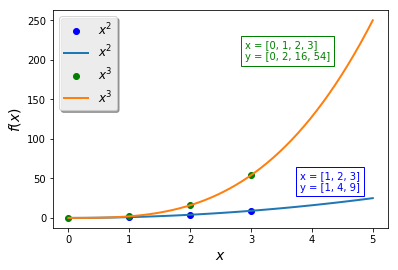

In [26]:
# %load scripts/ejemplo_05_4
import numpy as np
import matplotlib.pyplot as plt
#from ejemplo_05_2 import polinomio_interp

# -------------------- Definición de las funciones --------------------
x2, y2 = [1, 2, 3], [1, 4, 9]
f2 = polinomio_interp(x2, y2)

x3, y3 = [0, 1, 2, 3], [0, 2, 16, 54]
f3 = polinomio_interp(x3, y3)

# ---------------------------- Graficación ----------------------------
plt.ion()
plt.clf()

xx = np.linspace(0, 5, 50)

plt.plot(x2, y2, 'ob', xx, f2(xx), label='$x^2$')
plt.plot(x3, y3, 'og', xx, f3(xx), label='$x^3$')

# Agregamos el texto
plt.text(3.8, 35, 'x = {}\ny = {}'.format(str(x2), str(y2)),
         color='b', bbox={'facecolor': 'none', 'edgecolor': 'blue'})
plt.text(2.9, 200, 'x = {}\ny = {}'.format(str(x3), str(y3)),
         color='g', bbox={'facecolor': 'none', 'edgecolor': 'green'})

# Texto a ejes y leyenda
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')


En estos últimos dos ejemplos, y en particular en el último, estamos usando funciones que no definimos. Las funciones de graficación entre otras, están definidas en un paquete externo `matplotlib`. Para poder utilizar las funciones debemos primero *importar* el módulo donde están definidas.

Lo mismo ocurre con nuestro programa. Veamos en más detalle cómo es el mecanismo de importación.